In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes

In [2]:
X,y = load_diabetes(return_X_y=True, as_frame=True)

In [3]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [4]:
t1 = np.square
t2 = np.sin
t3 = lambda x: np.log(
    np.clip(x, 1e-4, None)
)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [6]:
LinearRegression().fit(X_train, y_train).score(X_train, y_train)

0.5015516188475683

In [7]:
LinearRegression().fit(X_train, y_train).score(X_test, y_test)

0.5675895725793205

In [8]:
X_train = pd.concat(
    (X_train,) + tuple(
    t(X_train) for t in (t1,t2,t3)
), axis=1)

X_test = pd.concat(
    (X_test,) + tuple(
    t(X_test) for t in (t1,t2,t3)
), axis=1)

In [9]:
filter_ = SelectKBest(k="all").fit(X_train, y_train)

In [10]:
(filter_.pvalues_ <= 0.05).sum(), X_train.shape

(16, (353, 40))

In [11]:
cols = X_train.columns[ filter_.pvalues_ <= 0.05 ]

In [12]:
lr = LinearRegression().fit(X_train[cols], y_train)
lr.score(X_train[cols], y_train)

0.5048658931166821

In [13]:
lr.score(X_test[cols], y_test)

0.572169564972076

In [14]:
from sklearn.metrics import mean_squared_error, max_error
import matplotlib.pyplot as plt

In [15]:
preds = lr.predict(X_test[cols])

In [16]:
y_test.mean()

150.96629213483146

In [17]:
np.round(mean_squared_error(y_test, preds, squared=False), 3)

51.917

In [18]:
max_error(y_test, preds)

127.0698952187783

0.7641515376744299

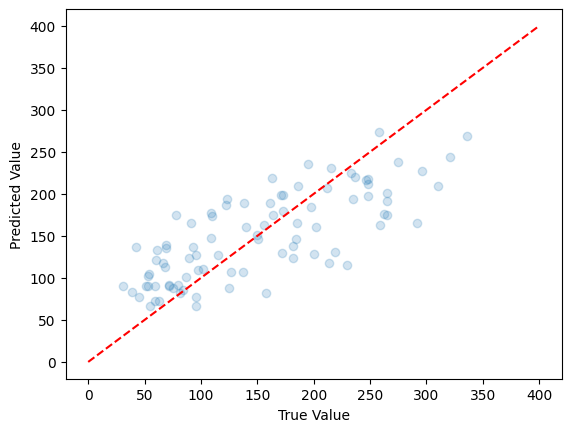

In [19]:
plt.scatter(y_test, preds, alpha=0.2)
plt.plot([0, 400], [0, 400], "r--")

plt.xlabel("True Value")
plt.ylabel("Predicted Value")

np.corrcoef(y_test,preds)[0,1]